In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('samples_nylonGuitar_1024_Mm7_R03.csv')

X = np.array(df.iloc[:,:-1], dtype=np.float)
y = np.array(df.iloc[:,-1], dtype=np.float)

In [7]:
import librosa

sample = librosa.core.stft(y=X[0], n_fft=1024, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')


print(sample)
print(sample.shape)
print(y[0])
sample = np.append(y[0],sample)
print(sample)
print(sample.shape)

[[ -7.20238646e-01  -5.01544944e-01   1.82757751e-01 ...,   1.73593716e-01
    6.20198082e-01   1.67341409e+00]
 [  7.08208600e-01   3.09872305e-01  -1.14695638e-01 ...,  -1.53498110e-01
   -2.44648974e-01  -1.96945409e+00]
 [ -9.03699447e-01   2.37903816e-01  -1.87462273e-01 ...,   7.58210044e-02
   -5.34895728e-01   2.37967327e+00]
 ..., 
 [  1.05264864e-03   8.77487351e-04   1.83663915e-03 ...,  -2.48573993e-03
   -3.26628623e-03  -1.72389814e-03]
 [ -1.09274858e-03  -4.15664566e-04  -1.70912561e-06 ...,  -3.63465717e-06
    6.41556900e-04   1.64839065e-03]
 [  1.12225790e-03  -2.90219230e-04  -1.83748116e-03 ...,   2.48593392e-03
    2.35290024e-03  -1.58178132e-03]]
(513, 9)
1.0
[ 1.         -0.72023865 -0.50154494 ...,  0.00248593  0.0023529
 -0.00158178]
(4618,)


/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/librosa/core/spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


In [8]:
>>> import matplotlib.pyplot as plt
>>> import librosa.display
>>> librosa.display.specshow(librosa.amplitude_to_db(sample,
...                                                  ref=np.max),
...                          y_axis='log', x_axis='time')
>>> plt.title('Power spectrogram')
>>> plt.colorbar(format='%+2.0f dB')
>>> plt.tight_layout()

IndexError: tuple index out of range

/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/librosa/core/spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


0

200

400

600

800

1000

1200

1400

1600

1800

2000

2200

2400

2600

2800

3000

3200

3400

3600

3800

4000

4200

4400

4600

4800

5000

5200

5400

5600

5800

6000

6200

6400

6600

6800

7000

7200

7400

7600

7800

8000

8200

8400

8600

8800

9000

9200

9400

9600

9800

10000

10200

10400

10600

10800

11000

11200

11400

11600

11800

12000

12200

12400

12600

12800

13000

13200

13400

13600

13800

14000

14200



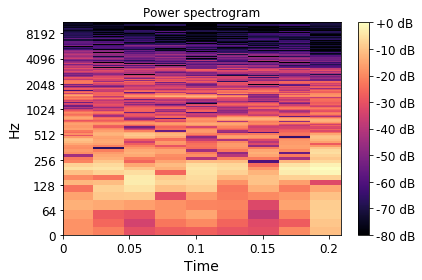

In [9]:
import os

processedData_path = "preprocessedSamples_spect.data"
processedX = np.zeros((len(X),513,9), dtype=np.float)
processedy = np.zeros(len(y), dtype=np.float)

for i in range(len(X)):
    processedX[i] = librosa.core.stft(y=X[i], n_fft=1024, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')
    processedy[i] = y[i]
    if i % 200 == 0:
        print(i)
        print()
        
librosa.display.specshow(librosa.amplitude_to_db(processedX[0], ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

15.0
[[  4.12552183e+00   2.55163733e+00  -1.02203705e+00 ...,  -4.91707875e-01
    3.85597479e+00   8.10109438e+00]
 [ -2.86129507e+00  -3.13331369e+00   1.85658644e+00 ...,   8.92903756e-01
   -2.67879689e+00  -8.77997081e+00]
 [  9.27906171e-02   4.20101982e+00  -3.81160646e+00 ...,  -7.98380337e-01
   -8.83300771e-01   9.89470903e+00]
 ..., 
 [  1.42517249e-02   2.12223923e-04  -2.07707690e-03 ...,   8.21337623e-03
    7.35603742e-03   3.31635493e-02]
 [ -1.44752314e-02  -5.52082720e-03  -1.38617226e-05 ...,   4.54342818e-06
   -1.22705610e-02  -3.16064510e-02]
 [  1.46409420e-02   7.58673905e-03   2.07654325e-03 ...,  -8.21436527e-03
    1.01205870e-02   3.01261581e-02]]
(12377, 513, 9) (12377,) (1000, 513, 9) (1000,)


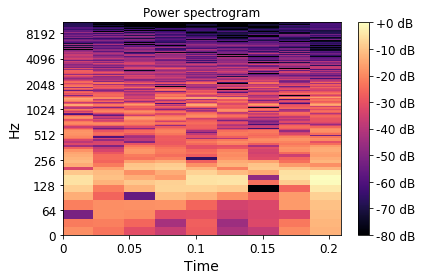

In [11]:
from sklearn.utils import shuffle
processedX, processedy = shuffle(processedX, processedy)

X_train = np.array(processedX[:-2000], dtype=np.float)
y_train = np.array(processedy[:-2000], dtype=np.float)

X_valid = np.array(processedX[-2000:-1000], dtype=np.float)
y_valid = np.array(processedy[-2000:-1000], dtype=np.float)

X_test = np.array(processedX[-1000:], dtype=np.float)
y_test = np.array(processedy[-1000:], dtype=np.float)
print(y_test[999])
print(X_test[999])

print(X_train.shape,y_train.shape, X_valid.shape, y_valid.shape)


librosa.display.specshow(librosa.amplitude_to_db(X_test[999], ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [24]:
import tensorflow as tf

height = 513
width = 9
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[-1, height, width], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

ValueError: Attr 'ksize' of 'MaxPool' Op passed list of length 3 less than minimum 4.

In [14]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [20]:
n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X_train))
        for rnd_indices in np.array_split(rnd_idx, len(X_train) // batch_size):
            X_reshaped = np.reshape(X_train,(len(X_train),-1))
            X_batch, y_batch = X_reshaped[rnd_indices], y_train[rnd_indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: X_valid,
                                                y: y_valid})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid,
                                           y: y_valid})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: X_test,
                                        y: y_test})
    print("Final accuracy on test set:", acc_test)
    #save_path = saver.save(sess, "./my_mnist_model")

InvalidArgumentError: Input to reshape is a tensor with 3342336 values, but the requested shape requires a multiple of 12544
	 [[Node: pool3/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](pool3/MaxPool, pool3/Reshape/shape)]]

Caused by op 'pool3/Reshape', defined at:
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-96c9989a787c>", line 43, in <module>
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2451, in reshape
    name=name)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 3342336 values, but the requested shape requires a multiple of 12544
	 [[Node: pool3/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](pool3/MaxPool, pool3/Reshape/shape)]]


In [ ]:
"""Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""

# infer n_inputs and n_outputs from the training set.
n_inputs = X_train.shape[1]
self.classes_ = np.unique(y)
n_outputs = len(self.classes_)

# Translate the labels vector to a vector of sorted class indices, containing
# integers from 0 to n_outputs - 1.
# For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
# labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
# will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
self.class_to_index_ = {label: index
                        for index, label in enumerate(self.classes_)}
y = np.array([self.class_to_index_[label]
              for label in y], dtype=np.int32)

self._graph = tf.Graph()
with self._graph.as_default():
    self._build_graph(n_inputs, n_outputs)

# needed in case of early stopping
max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty
best_params = None

# extra ops for batch normalization
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

# Now train the model!
self._session = tf.Session(graph=self._graph)
with self._session.as_default() as sess:
    self._init.run()
    for epoch in range(n_epochs):
        rnd_idx = np.random.permutation(len(X))
        for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
            X_batch, y_batch = X[rnd_indices], y[rnd_indices]
            feed_dict = {self._X: X_batch, self._y: y_batch}
            if self._training is not None:
                feed_dict[self._training] = True
            sess.run(self._training_op, feed_dict=feed_dict)
            if extra_update_ops:
                sess.run(extra_update_ops, feed_dict=feed_dict)
        if X_valid is not None and y_valid is not None:
            loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                         feed_dict={self._X: X_valid,
                                                    self._y: y_valid})
            if loss_val < best_loss:
                best_params = self._get_model_params()
                best_loss = loss_val
                checks_without_progress = 0
            else:
                checks_without_progress += 1
            print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                epoch, loss_val, best_loss, acc_val * 100))
            if checks_without_progress > max_checks_without_progress:
                print("Early stopping!")
                break
        else:
            loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                             feed_dict={self._X: X_batch,
                                                        self._y: y_batch})
            print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                epoch, loss_train, acc_train * 100))
    # If we used early stopping then rollback to the best model found
    if best_params:
        self._restore_model_params(best_params)
    return self